# Part1 : Unemployment in 2020 and Covid impact on it

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Load 'ABSLabourForceDetailedTable20c.csv' file into df DataFrame
df = pd.read_csv("source/ABSLabourForceDetailedTable20c.csv", encoding="utf-8")
df.head(10)

,Unnamed: 0,Australia ; Unemployed total ;,Australia ; > Unemployed looked for full-time work ;,Australia ; >> Unemployed looked for only full-time work ;,Australia ; >> Unemployed looked for both full-time and part-time work ;,Australia ; > Unemployed looked for only part-time work ;,> New South Wales ; Unemployed total ;,> New South Wales ; > Unemployed looked for full-time work ;,> New South Wales ; >> Unemployed looked for only full-time work ;,> New South Wales ; >> Unemployed looked for both full-time and part-time work ;,...,> Northern Territory ; Unemployed total ;,> Northern Territory ; > Unemployed looked for full-time work ;,> Northern Territory ; >> Unemployed looked for only full-time work ;,> Northern Territory ; >> Unemployed looked for both full-time and part-time work ;,> Northern Territory ; > Unemployed looked for only part-time work ;,> Australian Capital Territory ; Unemployed total ;,> Australian Capital Territory ; > Unemployed looked for full-time work ;,> Australian Capital Territory ; >> Unemployed looked for only full-time work ;,> Australian Capital Territory ; >> Unemployed looked for both full-time and part-time work ;,> Australian Capital Territory ; > Unemployed looked for only part-time work ;
0,Unit,000,000,000,000,000,000,000,000,000,...,000,000,000,000,000,000,000,000,000,000
1,Series Type,Original,Original,Original,Original,Original,Original,Original,Original,Original,...,Original,Original,Original,Original,Original,Original,Original,Original,Original,Original
2,Data Type,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,...,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK,STOCK
3,Frequency,Month,Month,Month,Month,Month,Month,Month,Month,Month,...,Month,Month,Month,Month,Month,Month,Month,Month,Month,Month
4,Collection Month,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Series Start,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,...,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014,Jul-2014
6,Series End,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,...,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021,Feb-2021
7,No. Obs,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
8,Series ID,A84088035W,A84088036X,A84088038C,A84088037A,A84088039F,A84088030K,A84088031L,A84088033T,A84088032R,...,A84088060X,A84088061A,A84088063F,A84088062C,A84088064J,A84088050V,A84088051W,A84088053A,A84088052X,A84088054C
9,Jul-2014,741.7,540.6,126.2,414.4,201.1,214.7,156.5,35.5,121.0,...,7.4,5.4,3.1,2.3,2.0,8.8,5.3,1.8,3.5,3.5


In [3]:
#Check the columns
df.columns

Index(['Unnamed: 0', 'Australia ;  Unemployed total ;',
       'Australia ;  > Unemployed looked for full-time work ;',
       'Australia ;  >> Unemployed looked for only full-time work ;',
       'Australia ;  >> Unemployed looked for both full-time and part-time work ;',
       'Australia ;  > Unemployed looked for only part-time work ;',
       '> New South Wales ;  Unemployed total ;',
       '> New South Wales ;  > Unemployed looked for full-time work ;',
       '> New South Wales ;  >> Unemployed looked for only full-time work ;',
       '> New South Wales ;  >> Unemployed looked for both full-time and part-time work ;',
       '> New South Wales ;  > Unemployed looked for only part-time work ;',
       '> Victoria ;  Unemployed total ;',
       '> Victoria ;  > Unemployed looked for full-time work ;',
       '> Victoria ;  >> Unemployed looked for only full-time work ;',
       '> Victoria ;  >> Unemployed looked for both full-time and part-time work ;',
       '> Victoria ;  > 

In [4]:
#Remove unwanted rows(title rows) from df
df = df.iloc[9:,:]
df

,Unnamed: 0,Australia ; Unemployed total ;,Australia ; > Unemployed looked for full-time work ;,Australia ; >> Unemployed looked for only full-time work ;,Australia ; >> Unemployed looked for both full-time and part-time work ;,Australia ; > Unemployed looked for only part-time work ;,> New South Wales ; Unemployed total ;,> New South Wales ; > Unemployed looked for full-time work ;,> New South Wales ; >> Unemployed looked for only full-time work ;,> New South Wales ; >> Unemployed looked for both full-time and part-time work ;,...,> Northern Territory ; Unemployed total ;,> Northern Territory ; > Unemployed looked for full-time work ;,> Northern Territory ; >> Unemployed looked for only full-time work ;,> Northern Territory ; >> Unemployed looked for both full-time and part-time work ;,> Northern Territory ; > Unemployed looked for only part-time work ;,> Australian Capital Territory ; Unemployed total ;,> Australian Capital Territory ; > Unemployed looked for full-time work ;,> Australian Capital Territory ; >> Unemployed looked for only full-time work ;,> Australian Capital Territory ; >> Unemployed looked for both full-time and part-time work ;,> Australian Capital Territory ; > Unemployed looked for only part-time work ;
9,Jul-2014,741.7,540.6,126.2,414.4,201.1,214.7,156.5,35.5,121.0,...,7.4,5.4,3.1,2.3,2.0,8.8,5.3,1.8,3.5,3.5
10,Aug-2014,733.8,517.2,106.1,411.1,216.6,214.4,148.7,32.8,115.9,...,5.4,4.5,1.5,3.0,1.0,11.2,6.8,1.4,5.4,4.4
11,Sep-2014,746.4,525.1,97.3,427.7,221.4,222.4,159.3,29.1,130.2,...,4.7,3.8,1.3,2.5,0.9,10.5,5.6,1.3,4.3,4.9
12,Oct-2014,752.0,518.9,87.4,431.5,233.1,220.7,152.8,23.4,129.4,...,3.9,3.2,0.8,2.5,0.7,12.4,7.9,2.2,5.7,4.5
13,Nov-2014,723.8,518.4,95.5,422.9,205.3,225.0,157.4,33.5,123.9,...,5.1,4.2,1.1,3.1,0.8,9.0,6.6,2.0,4.6,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Oct-2020,907.5,641.9,93.6,548.3,265.6,274.2,203.3,27.4,176.0,...,7.8,5.9,0.5,5.3,1.9,9.4,7.3,2.3,5.0,2.1
85,Nov-2020,875.2,634.8,91.7,543.1,240.4,261.5,199.9,29.7,170.3,...,8.5,6.6,0.9,5.7,1.8,9.2,7.0,2.0,5.0,2.1
86,Dec-2020,873.3,635.8,99.6,536.2,237.5,270.3,201.4,33.8,167.7,...,6.7,5.2,1.1,4.1,1.5,9.0,6.3,1.2,5.0,2.7
87,Jan-2021,938.0,672.8,104.6,568.2,265.2,275.4,203.1,29.8,173.3,...,8.2,6.2,1.0,5.3,2.0,11.8,8.4,2.5,5.8,3.4


In [5]:
#Remove unwanted columns from df
df = df.loc[:,['Unnamed: 0','Australia ;  Unemployed total ;','> New South Wales ;  Unemployed total ;','> Victoria ;  Unemployed total ;','> Queensland ;  Unemployed total ;','> South Australia ;  Unemployed total ;','> Western Australia ;  Unemployed total ;','> Tasmania ;  Unemployed total ;','> Northern Territory ;  Unemployed total ;','> Australian Capital Territory ;  Unemployed total ;']]
df

,Unnamed: 0,Australia ; Unemployed total ;,> New South Wales ; Unemployed total ;,> Victoria ; Unemployed total ;,> Queensland ; Unemployed total ;,> South Australia ; Unemployed total ;,> Western Australia ; Unemployed total ;,> Tasmania ; Unemployed total ;,> Northern Territory ; Unemployed total ;,> Australian Capital Territory ; Unemployed total ;
9,Jul-2014,741.7,214.7,208.1,159.4,57.8,67.4,18.0,7.4,8.8
10,Aug-2014,733.8,214.4,211.2,159.5,48.8,65.5,17.8,5.4,11.2
11,Sep-2014,746.4,222.4,210.7,154.2,56.0,69.1,18.9,4.7,10.5
12,Oct-2014,752.0,220.7,206.7,167.3,57.1,67.3,16.4,3.9,12.4
13,Nov-2014,723.8,225.0,197.3,153.2,54.9,62.0,17.3,5.1,9.0
...,...,...,...,...,...,...,...,...,...,...
84,Oct-2020,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4
85,Nov-2020,875.2,261.5,241.5,188.1,55.7,90.2,20.6,8.5,9.2
86,Dec-2020,873.3,270.3,229.3,192.3,56.4,90.3,19.1,6.7,9.0
87,Jan-2021,938.0,275.4,250.0,208.0,67.7,100.0,17.0,8.2,11.8


In [28]:
#Create unemployed_df DataFrame by renaming columns in df
unemployed_df = df.rename (columns ={'Unnamed: 0':'Month',
                                     'Australia ;  Unemployed total ;':'Total',
                                     '> New South Wales ;  Unemployed total ;':'NSW',
                                     '> Victoria ;  Unemployed total ;':'VIC',
                                     '> Queensland ;  Unemployed total ;':'QLD',
                                     '> South Australia ;  Unemployed total ;':'SA',
                                     '> Western Australia ;  Unemployed total ;':'WA',
                                     '> Tasmania ;  Unemployed total ;':'TAS',
                                     '> Northern Territory ;  Unemployed total ;':'NT',
                                     '> Australian Capital Territory ;  Unemployed total ;':'ACT'})
unemployed_df

,Month,Total,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
9,Jul-2014,741.7,214.7,208.1,159.4,57.8,67.4,18.0,7.4,8.8
10,Aug-2014,733.8,214.4,211.2,159.5,48.8,65.5,17.8,5.4,11.2
11,Sep-2014,746.4,222.4,210.7,154.2,56.0,69.1,18.9,4.7,10.5
12,Oct-2014,752.0,220.7,206.7,167.3,57.1,67.3,16.4,3.9,12.4
13,Nov-2014,723.8,225.0,197.3,153.2,54.9,62.0,17.3,5.1,9.0
...,...,...,...,...,...,...,...,...,...,...
84,Oct-2020,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4
85,Nov-2020,875.2,261.5,241.5,188.1,55.7,90.2,20.6,8.5,9.2
86,Dec-2020,873.3,270.3,229.3,192.3,56.4,90.3,19.1,6.7,9.0
87,Jan-2021,938.0,275.4,250.0,208.0,67.7,100.0,17.0,8.2,11.8


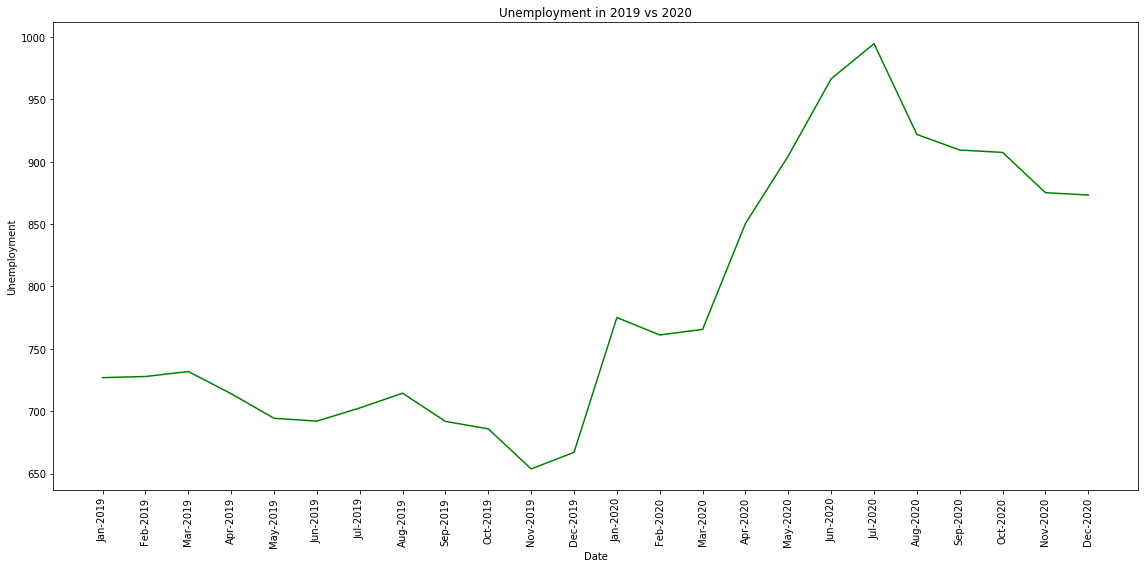

In [55]:
# Create a dataframe to compare 2019 and 2020 unemployment 

unemployedcompare_df = unemployed_df.loc[unemployed_df['Month'].str[-4:]>'2018']
unemployedcompare_df = unemployedcompare_df.loc[unemployed_df['Month'].str[-4:]<'2021']

# filter dataframe for total
unemployedcompare_filtered = unemployedcompare_df.filter(items=["Month", "Total"])
unemployedcompare_filtered

unemploy_date = unemployedcompare_filtered["Month"]
unemploy_total = unemployedcompare_filtered["Total"].astype(float)

plt.figure(figsize=(16, 8))

plt.plot(unemploy_date, unemploy_total, color='green')

plt.title("Unemployment in 2019 vs 2020")
plt.xlabel("Date")
plt.ylabel("Unemployment")
plt.xticks(rotation = 90)

plt.tight_layout()

plt.savefig('Outputs/Unemployment in 2019 vs 2020')


In [43]:
unemployedcompare_filtered.dtypes

Month    object
Total    object
dtype: object

In [8]:
#Create unemployed2020_df DataFrame by filtering unemployed_df for 2020 data
unemployed2020_df = unemployed_df.loc[unemployed_df['Month'].str[-4:]=='2020']
unemployed2020_df['Month'] = unemployed2020_df['Month'].map(lambda x: x.replace("2020","20"))
unemployed2020_df

/Users/stephaniesalvona/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Month,Total,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
75,Jan-20,775.1,205.2,211.4,180.8,53.9,92.1,16.6,7.3,7.7
76,Feb-20,761.1,215.1,209.1,167.2,56.7,82.1,14.5,8.5,8.0
77,Mar-20,765.6,222.9,198.5,167.5,60.1,86.6,13.8,7.6,8.5
78,Apr-20,850.5,262.5,215.3,188.1,63.9,86.1,16.2,8.6,9.8
79,May-20,904.7,261.0,231.0,201.7,68.2,108.4,16.0,9.5,9.0
80,Jun-20,966.5,284.2,250.8,207.2,75.8,113.3,17.8,7.2,10.1
81,Jul-20,994.7,306.0,236.3,228.9,71.6,114.2,17.1,9.7,10.9
82,Aug-20,921.9,280.0,246.0,194.0,68.8,99.5,17.2,5.9,10.6
83,Sep-20,909.4,296.2,223.0,198.9,59.6,95.4,20.1,6.7,9.4
84,Oct-20,907.5,274.2,241.4,200.5,61.2,92.6,20.5,7.8,9.4


#### Plesae note that unemployed2020_df figures need to be mutiple by 1000 (based on unit in Table20c in ABS Labour Force Detailed Dataset)

In [ ]:
#Load 'Covid19State.csv' file into Covid19State_df DataFrame
Covid19State_df = pd.read_csv("source/Covid19State.csv", encoding="utf-8")

Covid19State_df


In [ ]:
#Create covid_df DataFrame by filtering 2020 data 
covid_df = Covid19State_df.iloc[2:14,:]
covid_df

In [ ]:
# Use covid dataframe to get a breakdown by state. remove columns we dont need

covid_sum = covid_df.drop(columns=['Month', 'Australia'])

# sum each state 
covid_pie = covid_sum.sum()


# create a pie chart showing covid for each state

covid_pie = covid_pie.plot(kind="pie", autopct="%1.1f%%", figsize=(14,10), pctdistance=0.95)
plt.title('COVID % by State')
plt.ylabel('COVID States')

plt.tight_layout()

plt.savefig('Outputs/COVID by State pie')

# plt.figure(figsize=(5,5))
# plt.pie(values ,autopct = '%1.1f%%')
# plt.title('Gender Composition in 2016')

# get pie for unemployment 

# unemployed2020_df

# unemploy_sum = unemployed2020_df.drop(columns=['Month', 'Total'])
# unemploy_sum.head()




# sum each state 
# unemploy_pie = unemploy_sum.sum()
# unemploy_pie


# plot the pie for unemployment 
# unemploy_pie = unemploy_pie.plot(kind="pie", autopct="%1.1f%%", figsize=(14,10))
# plt.title('Unemployment % by State')
# plt.ylabel('Unemployment States')

# plt.show()

In [ ]:
   
# covid_sum = covid_df.sum()
# covid_sum

# covid_sum_df = pd.DataFrame(sum_df)

# covid_sum_df = covid_sum_df.drop(index='Month')
# covid_sum_df = covid_sum_df.drop(index='Australia')

# # flip columns

# # covid_sum_df = covid_sum_df.T

# covid_sum_df = covid_sum_df.reset_index()
# covid_sum_df.rename(columns={'index': 'State',
#                          0: 'Total'})

# covid_pie = covid_sum_df.plot.pie(y='Total', figsize=(5, 5))

In [ ]:

#Merge unemployed2020_df and covid_df DataFrames
merged_df = pd.merge(unemployed2020_df,covid_df, on="Month", suffixes=('_Unemployed', '_Covid19Cases'), how= 'inner')
merged_df

In [ ]:
#rename some columns in merged_df
merged_df = merged_df.rename (columns ={'Month':'@Month',
                                        'Total' : 'total_unemployed',
                                        'Australia':'total_Australia_Covid19Cases'})
merged_df

In [ ]:
#Create CovidUnemployment_df DataFrmae by sorting the columns in merged_df
CovidUnemployment_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
CovidUnemployment_df

In [ ]:
#rename index and remove unwanted column
CovidUnemployment_df = CovidUnemployment_df.rename(index = {0:'Jan-20',1:'Feb-20',2:'Mar-20',
                                                            3:'Apr-20',4:'May-20',5:'Jun-20',
                                                            6:'Jul-20',7:'Aug-20',8:'Sep-20',
                                                            9:'Oct-20',10:'Nov-20',11:'Dec-20'})
CovidUnemployment_df = CovidUnemployment_df.iloc[:,1:]
CovidUnemployment_df

In [ ]:
# CovidUnemployment for VIC
VICWA_CovidUnemployment = pd.DataFrame({
    "VIC_Covid19Cases":CovidUnemployment_df["VIC_Covid19Cases"].astype(float),
    "VIC_Unemployed":CovidUnemployment_df["VIC_Unemployed"].astype(float),
    "WA_Covid19Cases":CovidUnemployment_df["WA_Covid19Cases"].astype(float),
    "WA_Unemployed":CovidUnemployment_df["WA_Unemployed"].astype(float),
    }, 
    index=['Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20']
)
VICWA_CovidUnemployment

In [ ]:
VICWA_CovidUnemployment.dtypes

In [ ]:
# Add Plots and graphs related to CovidUnemployment_df

In [ ]:
covid_df

In [ ]:
#Plot bar chart based on Total Covid cases in Austrlia during 2020
x_axis = covid_df['Month']
y_axis= covid_df['Australia']
plt.figure(figsize=(14,10))
plt.bar(x_axis,y_axis)
plt.yscale('log')

In [ ]:
# VICWA_CovidUnemployment.plot.bar(figsize=(14,10))
# plt.yscale('log', base=2)

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['VIC_Covid19Cases'],color = 'red',label='covid')
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['VIC_Unemployed'],color = 'blue',label='covid')
plt.title("VIC Covid vs Unemployment Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Cases")

In [ ]:
VICWA_CovidUnemployment

In [ ]:
plt.figure(figsize=(8,7))
# plt.subplot(2,1,1)
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['VIC_Covid19Cases'],color = 'blue',label='covid')
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['WA_Covid19Cases'],color = 'red',label='covid')
plt.title("VIC Covid vs WA Covid Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Cases")

plt.figure(figsize=(8,7))
# plt.subplot(2,1,2)
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['VIC_Unemployed'],color = 'blue',label='covid')
plt.plot(VICWA_CovidUnemployment.index,VICWA_CovidUnemployment['WA_Unemployed'],color = 'red',label='covid')
plt.title("VIC Unemployed vs WA Unemployed Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Cases")

plt.show()

In [ ]:
CovidUnemployment_df

In [ ]:

# define x and y values 

y_value = VICWA_CovidUnemployment['VIC_Covid19Cases']

x_value = VICWA_CovidUnemployment['VIC_Unemployed']

# Get the regression on max temp vs lat 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Get the line equation 
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# plot graph and add titles & labels 
plt.scatter(x_value,y_value)
plt.ylabel('COVID Cases')
plt.xlabel('Unemployment')
plt.title("VIC Unemployments vs VIC COVID cases")

# place equation and line on graph
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
plt.plot(x_value,regress_values,"r-")


correlation = st.pearsonr(x_value, x_value)
                         
print(f"The correlation between VIC Unemployments and COVID cases is {round (correlation[0],2)}")

plt.show()

In [ ]:
y_value = VICWA_CovidUnemployment["WA_Covid19Cases"]

x_value = VICWA_CovidUnemployment["WA_Unemployed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value)

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('COVID Cases')
plt.ylabel('Unemployment')

correlation = st.pearsonr(x_value, x_value)
                         
print(f"The correlation between VIC Unemployments and COVID cases is {round(correlation[0],2)}")

plt.show()

In [ ]:
# Find Coorelation 

# Part2 : Job Vacancies in 2020 and Covid impact on it

In [ ]:
#Load 'ABSJobVacancies_Table1.csv' into df1 DataFrame
df1 = pd.read_csv("source/ABSJobVacancies_Table1.csv", encoding="utf-8")
df1.head(10)

In [ ]:
#Remove unwanted rows(title rows) from df1
df1 = df1.iloc[9:,:10]
df1

In [ ]:
#Check the columns of df1
df1.columns

In [ ]:
#Create job_df DataFrame by renaming 
job_df = df1.rename(columns ={'Unnamed: 0':'Quarter',
                                        'Job Vacancies ;  New South Wales ;':'NSW_JobVac',
                                        'Job Vacancies ;  Victoria ;':'VIC_JobVac',
                                        'Job Vacancies ;  Queensland ;':'QLD_JobVac',
                                        'Job Vacancies ;  South Australia ;':'SA_JobVac',
                                        'Job Vacancies ;  Western Australia ;':'WA_JobVac',
                                        'Job Vacancies ;  Tasmania ;':'TAS_JobVac',
                                        'Job Vacancies ;  Northern Territory ;':'NT_JobVac',
                                        'Job Vacancies ;  Australian Capital Territory ;':'ACT_JobVac',
                                        'Job Vacancies ;  Australia ;':'total_Australia_JobVac'})
job_df

In [ ]:
job_df = job_df.loc[job_df['Quarter'].str[-4:]=='2020']
job_df['Quarter'] = job_df['Quarter'].map(lambda x: x.replace("2020","20"))
job_df

In [ ]:
job_df= job_df.rename(index = {172:'Feb-20',173:'May-20',174:'Aug-20',175:'Nov-20'})
job_df = job_df.iloc[:,1:]
job_df

In [ ]:
Covid19State_df

In [ ]:
#Create a Dataframe of Covid19State Dataframe for each Quarter in 2020
Q1 = Covid19State_df.iloc[1:4,:]
print(f"Q1:\n{Q1}")
Q2 = Covid19State_df.iloc[4:7,:]
print(f"Q2:\n{Q2}")
Q3 = Covid19State_df.iloc[7:10,:]
print(f"Q3:\n{Q3}")
Q4 = Covid19State_df.iloc[10:13,:]
print(f"Q4:\n{Q4}")

In [ ]:
# Create Covid total summery for each quarter (Feb-20,May-20,Aug-20,Nov-20)
Q1_covid = pd.DataFrame(Q1.iloc[:,1:].sum())
Q2_covid = pd.DataFrame(Q2.iloc[:,1:].sum())
Q3_covid = pd.DataFrame(Q3.iloc[:,1:].sum())
Q4_covid = pd.DataFrame(Q4.iloc[:,1:].sum())
# Reset and rename the index of each quarter
Q1_covid.reset_index(inplace=True)
Q2_covid.reset_index(inplace=True)
Q3_covid.reset_index(inplace=True)
Q4_covid.reset_index(inplace=True)
cQ1= Q1_covid.rename(columns={'index':'Quarter'})
cQ2 = Q2_covid.rename(columns={'index':'Quarter'})
cQ3 = Q3_covid.rename(columns={'index':'Quarter'})
cQ4 = Q4_covid.rename(columns={'index':'Quarter'})
#Create a Quarter Covid DataFrame which contians total covid cases in each state for each quarter
c1 = pd.merge(cQ1,cQ2,on='Quarter')
c2 = pd.merge(cQ3,cQ4,on='Quarter')
Covid_Quarter_df = pd.merge(c1,c2,on='Quarter')
#rename columns and index the Quarter Covid DataFrame and transpose it, then remove the first row which contains the title
Covid_Quarter_df = Covid_Quarter_df.rename(columns={'0_x_x':'Feb-20','0_y_x':'May-20','0_x_y':'Aug-20','0_y_y':'Nov-20'})
Covid_Quarter_df = Covid_Quarter_df.rename(index = {0:'ACT_CovidCase', 1:'NSW_CovidCase', 2:'NT_CovidCase',3:'QLD_CovidCase',4:'SA_CovidCase',5:'TAS_CovidCase',6:'VIC_CovidCase',7:'WA_CovidCase',8:'total_Australia_CovidCase'})
Covid_Quarter_df = Covid_Quarter_df.T  # Covid_Quarter_df is now trasposed
Covid_Quarter_df = Covid_Quarter_df .iloc[1:,]
Covid_Quarter_df

In [ ]:
#Merge the Quarter Covid DataFrame and Job Vacancies DataFrame and then sort the columns
Covid_JobVac_df = pd.merge(job_df,Covid_Quarter_df,left_index=True, right_index=True)
Covid_JobVac_df= Covid_JobVac_df.reindex(sorted(Covid_JobVac_df.columns), axis=1)
Covid_JobVac_df

In [ ]:
# Add Plots and graphs related to Covid_JobVac_df

In [ ]:
VIC_Covid_JobVac_df = pd.DataFrame({'Month':['Feb-20','May-20','Aug-20','Nov-20'],
                                    'VIC_CovidCase':Covid_JobVac_df['VIC_CovidCase'].astype(float),
                                   'VIC_JobVac':Covid_JobVac_df['VIC_JobVac'].astype(float)
                                  })
VIC_Covid_JobVac_df.reset_index(drop=True)

In [ ]:
VIC_Covid_JobVac_df.dtypes

In [ ]:
VIC_Covid_JobVac_df.plot.bar()
plt.yscale('log')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['VIC_JobVac'],color = 'blue',label='covid')
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['WA_JobVac'],color = 'red',label='covid')
plt.title("VIC Job Vacancies vs WA Job Vacancies Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Cases")

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['VIC_CovidCase'],color = 'blue',label='covid')
plt.plot(Covid_JobVac_df.index,Covid_JobVac_df['WA_CovidCase'],color = 'red',label='covid')
plt.title("VIC Job CovidCase vs WA Job CovidCase Study")
plt.xlabel("Month")
plt.ylabel("Numbers of Cases")

In [ ]:
covid_df

In [ ]:
# Find Coorelation 